In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_url = './housing.data'
df_data = pd.read_csv(data_url, sep='\s+', header = None, dtype = np.float64)
df_data.columns = ['CRIM', 'ZN', "INDUS", "CHAS", 'NOX', 'RM', 'AGE',
                   'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Plot

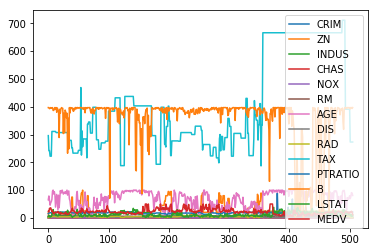

In [3]:
df_data.plot()
plt.show()

### Scatter

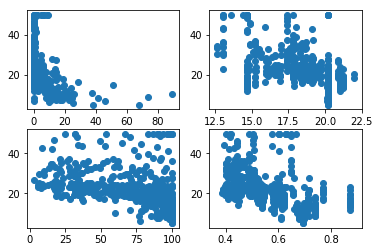

In [4]:
fig = plt.figure()
ax = []
for i in range(1,5):
    ax.append(fig.add_subplot(2,2,i))
    
ax[0].scatter(df_data['CRIM'], df_data['MEDV'])
ax[1].scatter(df_data['PTRATIO'], df_data['MEDV'])
ax[2].scatter(df_data['AGE'], df_data['MEDV'])
ax[3].scatter(df_data['NOX'], df_data['MEDV'])

plt.show()

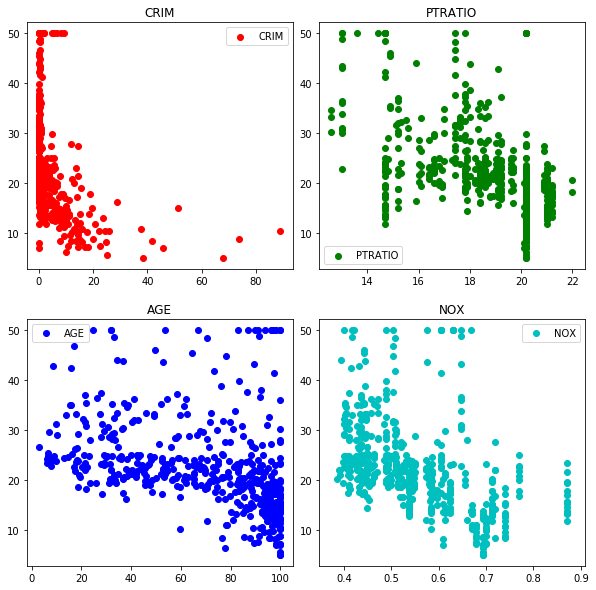

In [5]:
fig = plt.figure()
fig.set_size_inches(10.0,10.0, forward=True)
ax = []
for i in range(1,5):
    ax.append(fig.add_subplot(2,2,i))

columns = ["CRIM","PTRATIO","AGE","NOX"]
colors = ["r","g","b","c"]
for i in range(4):
    ax[i].scatter(df_data[columns[i]], df_data['MEDV'], c=colors[i], label=columns[i])
    ax[i].legend()
    ax[i].set_title(columns[i])

plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

### Histogram

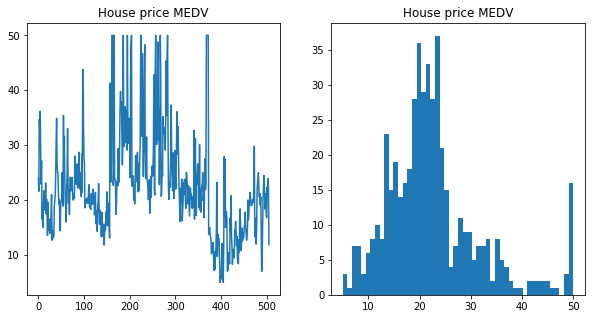

In [6]:
fig = plt.figure()
fig.set_size_inches(10,5)
ax_1 = fig.add_subplot(1,2,1)
ax_2 = fig.add_subplot(1,2,2)
ax_1.plot(df_data['MEDV'])
ax_2.hist(df_data['MEDV'], bins=50)
ax_1.set_title("House price MEDV")
ax_2.set_title("House price MEDV")

plt.show()

### Scaled boxplot

In [7]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scale_data = std_scaler.fit_transform(df_data)
df_scale = pd.DataFrame(scale_data)
df_scale.columns = ['CRIM', 'ZN', "INDUS", "CHAS", 'NOX', 'RM', 'AGE',
                   'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_scale.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


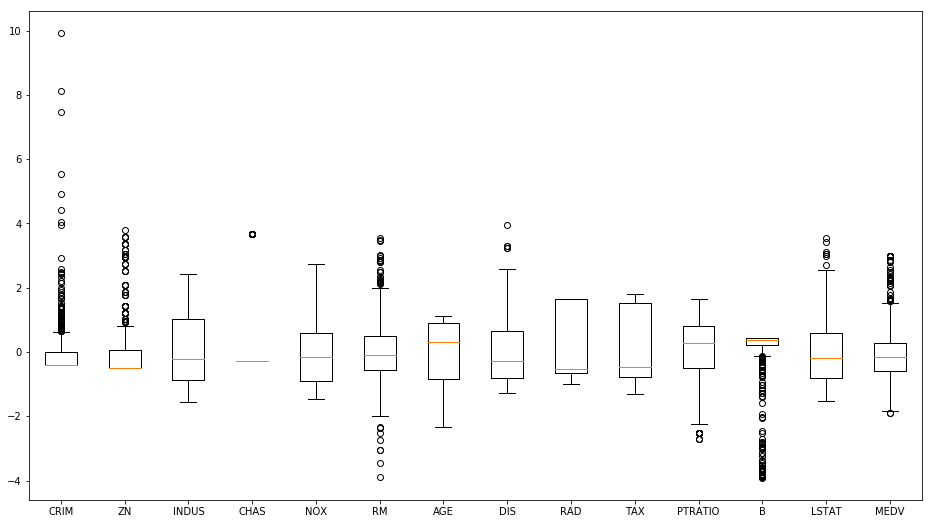

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot(scale_data, labels=df_data.columns)
fig.set_size_inches(16, 9)

plt.show()

### Scatter matrix

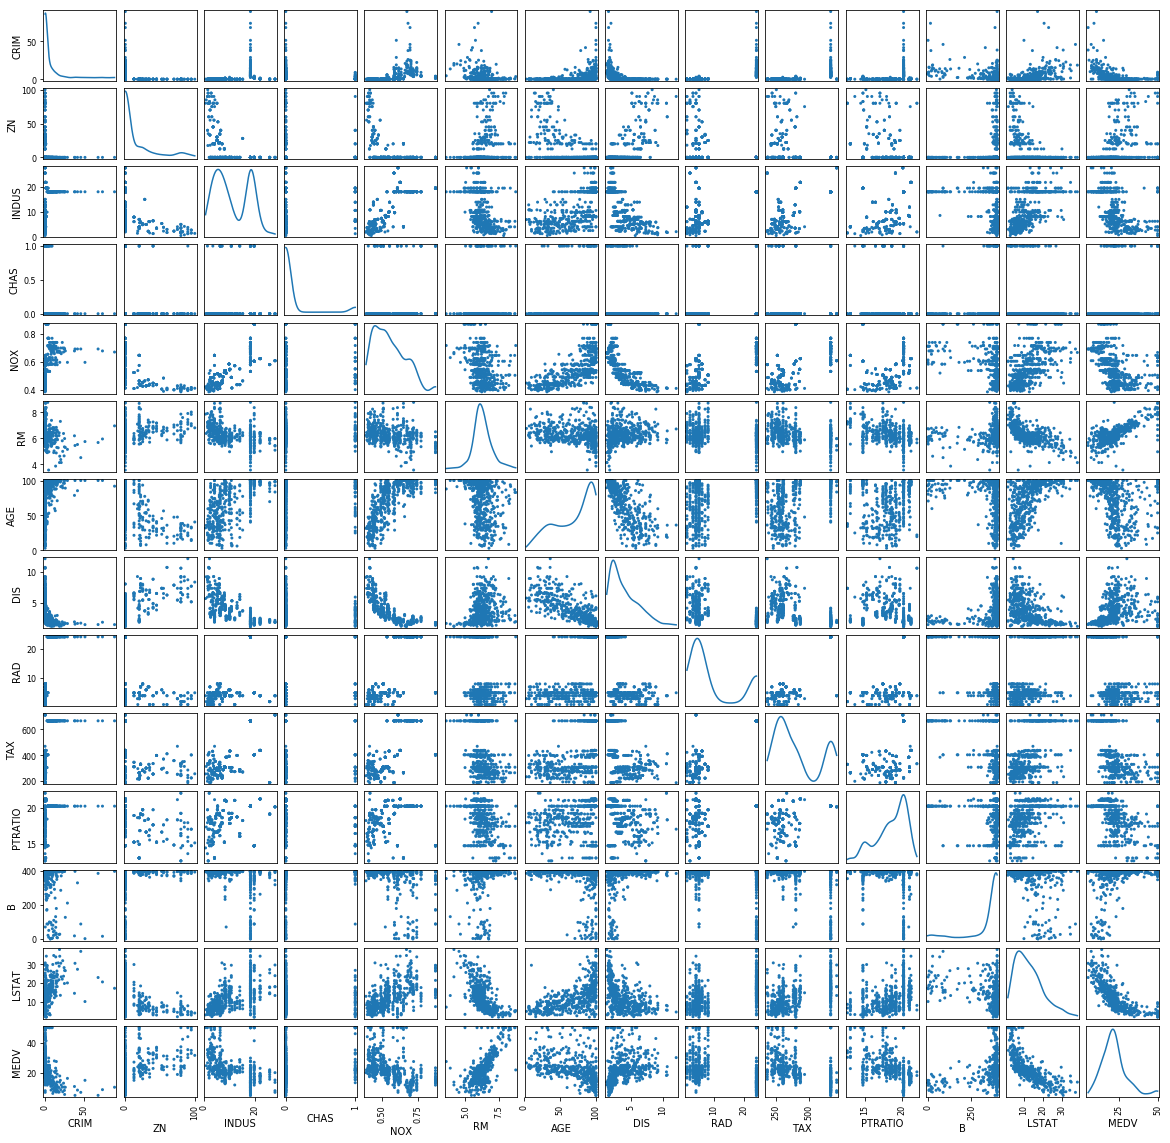

In [9]:
pd.plotting.scatter_matrix(df_data, alpha=1, figsize=(20,20), diagonal="kde")

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [10]:
corr_data = np.corrcoef(scale_data.T)
corr_data

array([[ 1.        , -0.20046922,  0.40658341, -0.05589158,  0.42097171,
        -0.2192467 ,  0.35273425, -0.37967009,  0.62550515,  0.58276431,
         0.28994558, -0.38506394,  0.45562148, -0.38830461],
       [-0.20046922,  1.        , -0.53382819, -0.04269672, -0.51660371,
         0.31199059, -0.56953734,  0.66440822, -0.31194783, -0.31456332,
        -0.39167855,  0.17552032, -0.41299457,  0.36044534],
       [ 0.40658341, -0.53382819,  1.        ,  0.06293803,  0.76365145,
        -0.39167585,  0.64477851, -0.70802699,  0.59512927,  0.72076018,
         0.38324756, -0.35697654,  0.60379972, -0.48372516],
       [-0.05589158, -0.04269672,  0.06293803,  1.        ,  0.09120281,
         0.09125123,  0.08651777, -0.09917578, -0.00736824, -0.03558652,
        -0.12151517,  0.04878848, -0.0539293 ,  0.17526018],
       [ 0.42097171, -0.51660371,  0.76365145,  0.09120281,  1.        ,
        -0.30218819,  0.7314701 , -0.76923011,  0.61144056,  0.6680232 ,
         0.18893268, -0.38

In [11]:
corr_data.shape

(14, 14)

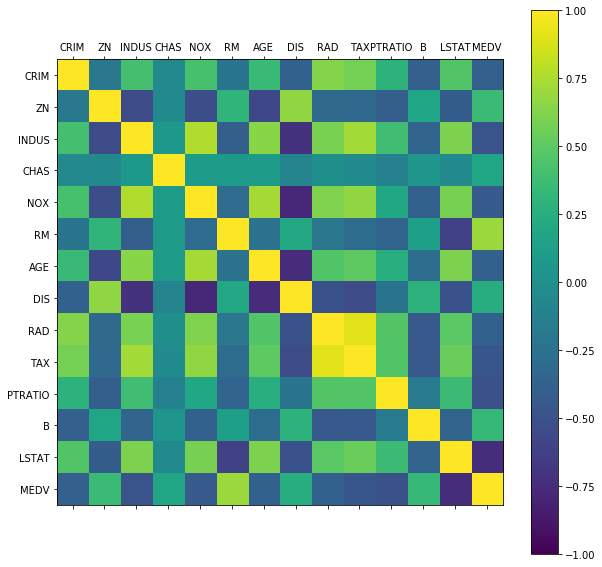

In [12]:
fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(111)
cax = ax.matshow(corr_data, vmin=-1, vmax=1, interpolation='nearest')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(df_data.columns)
ax.set_yticklabels(df_data.columns)

plt.show()